In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [4]:
class AgentState(TypedDict):
    n_1: int
    op_1: str
    n_2: int
    n_3: int
    op_2: str
    n_4: int
    final_1: int
    final_2: int


In [5]:
def adder(state: AgentState)-> AgentState:
    """Adds two numbers."""
    state["final_1"] = state["n_1"] + state["n_2"]
    return state

def adder2(state: AgentState)-> AgentState:
    """Adds two numbers."""
    state["final_2"] = state["n_3"] + state["n_4"]
    return state

def subtractor(state: AgentState)-> AgentState:
    """Subtracts two numbers."""
    state["final_1"] = state["n_1"] - state["n_2"]
    return state

def subtractor2(state: AgentState)-> AgentState:
    """Subtracts two numbers."""
    state["final_2"] = state["n_3"] - state["n_4"]
    return state

def decide_1(state:AgentState) -> AgentState:
    """Decides which operation to perform on the first two numbers."""
    if state["op_1"] == "+":
        return "addition_operation_1"
    elif state["op_1"] == "-":
        return "subtraction_operation_1"
    
def decide_2(state:AgentState) -> AgentState:
    """Decides which operation to perform on the second two numbers."""
    if state["op_2"] == "+":
        return "addition_operation_2"
    elif state["op_2"] == "-":
        return "subtraction_operation_2"

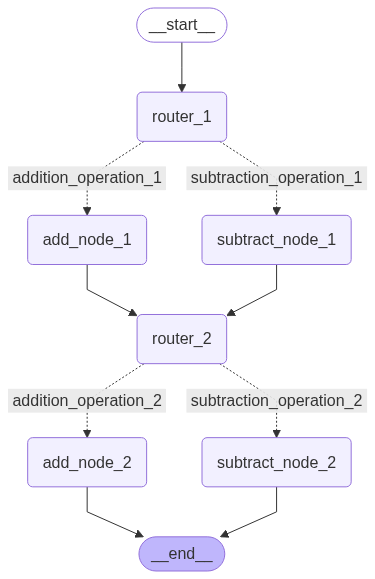

In [7]:
graph = StateGraph(AgentState)

graph.add_node("add_node_1", adder)
graph.add_node("subtract_node_1", subtractor)
graph.add_node("add_node_2", adder2)
graph.add_node("subtract_node_2", subtractor2)

graph.add_node("router_1", lambda state: state)
graph.add_node("router_2", lambda state: state)

graph.add_edge(START, "router_1")
graph.add_conditional_edges(
    "router_1",
    decide_1,
    {
        "addition_operation_1": "add_node_1",
        "subtraction_operation_1": "subtract_node_1"
    }
)
graph.add_edge("add_node_1", "router_2")
graph.add_edge("subtract_node_1", "router_2")
graph.add_conditional_edges(
    "router_2",
    decide_2,
    {
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2"
    }
)
graph.add_edge("add_node_2", END)
graph.add_edge("subtract_node_2", END)

app = graph.compile()
app

In [8]:
initial_state = AgentState(n_1 = 10, op_1 = "-", n_2 = 5, n_3 = 7, n_4 = 2, op_2 = "+")


In [9]:
print("Initial State:", initial_state)

Initial State: {'n_1': 10, 'op_1': '-', 'n_2': 5, 'n_3': 7, 'n_4': 2, 'op_2': '+'}


In [10]:
print(app.invoke(initial_state))

{'n_1': 10, 'op_1': '-', 'n_2': 5, 'n_3': 7, 'op_2': '+', 'n_4': 2, 'final_1': 5, 'final_2': 9}
